### 人脸检测


In [2]:
import numpy as np
import cv2

img = cv2.imread('./p3.png')

# 变成黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建haar级联器
face = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

# 检测人脸
faces = face.detectMultiScale(gray)

# print(type(faces))
# print(faces)

# 画出检测出的人脸框
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.data.haarcascades

'D:\\Miniconda\\Lib\\site-packages\\cv2\\data\\'

In [8]:
### 世界物理合照图片人脸检测
img = cv2.imread('Physicists photo.jpg')

# 变成黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建haar级联器
face = cv2.CascadeClassifier('./haarcascade_frontalface_alt2.xml')

# 检测人脸
faces = face.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# print(type(faces))
# print(faces)

# 画出检测出的人脸框
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
### 检测眼睛
img = cv2.imread('./p3.png')

# 变成黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建haar级联器
face = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye = cv2.CascadeClassifier('./haarcascade_eye.xml')

# 检测人脸，画出检测出的人脸框
faces = face.detectMultiScale(gray)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    # 在人脸区域继续检测眼镜
    roi_img = img[y: y + h, x: x + w]
    eyes = eye.detectMultiScale(roi_img)
    for (ox, oy, ow, oh) in eyes:
        cv2.rectangle(roi_img, (ox, oy), (ox + ow, oy + oh), (0, 255, 0), 2)
        roi_eye = roi_img[oy: oy + oh, ox: ox + ow]
        img[y: y + h, x: x + w] = roi_img
        
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 车牌识别

In [ ]:
cv2.threshold??

此5N555



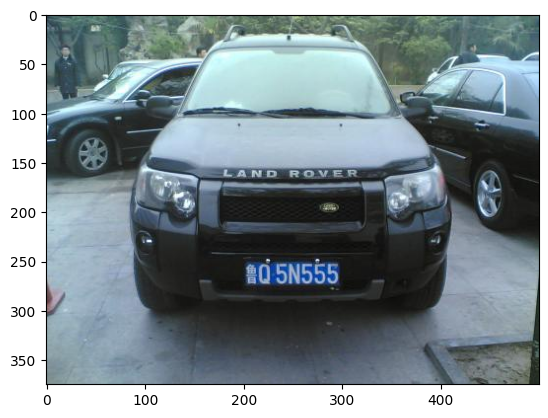

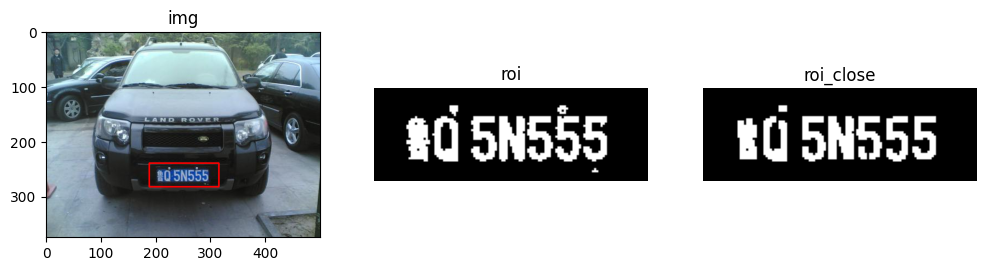

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract

img = cv2.imread('chinacar.jpeg')
# 变成黑白图片
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.rectangle(img, (270, 240), (270+130, 240 + 40), (0, 255, 0), 2)
plt.imshow(img[:,:,::-1]);

# 创建haar级联器
car = cv2.CascadeClassifier('./haarcascade_russian_plate_number.xml')
car_plate  = car.detectMultiScale(gray,scaleFactor=1.05)
for (x, y, w, h) in car_plate :
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    roi = gray[y: y + h, x: x + w]
    
    # 二值化
    _, roi = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    #cv2.imshow('roi', roi_bin)
    # 开操作
    kernel = np.ones(shape=(3, 3), dtype=np.uint8)
    roi_close= cv2.morphologyEx(roi, cv2.MORPH_OPEN, kernel, iterations=1)
    #cv2.imshow('roi2', roi)
    result = pytesseract.image_to_string(roi_close, lang='chi_sim+eng', config='--psm 8 --oem 3')
    print(result)
    plt.figure(figsize=[12,6]);
    plt.subplot(131); plt.imshow(img[:,:,::-1]);plt.title("img");
    plt.subplot(132); plt.imshow(roi,cmap='gray');plt.axis('off');plt.title("roi");
    plt.subplot(133); plt.imshow(roi_close,cmap='gray');plt.axis('off');plt.title("roi_close");


。 苹果: brew install tesseract tesseract-lang
eubantu: apt install tesseract tesseract-lang
e。 windows: 网上下载tesseract安装包.



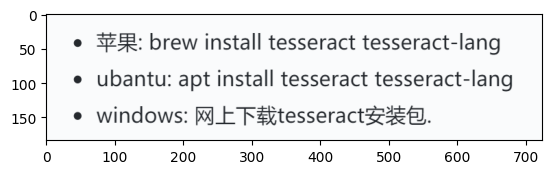

In [12]:
import matplotlib.pyplot as plt
import cv2
import pytesseract

img = cv2.imread('1.png')
plt.imshow(img[:,:,::-1])

# 配置参数
custom_config = r'--oem 1 --psm 1 -l chi_sim'

# 执行OCR识别
text = pytesseract.image_to_string(img, config=custom_config)

# 打印识别结果
print(text)

。 苹果: brew install tesseract tesseract-lang
eubantu: apt install tesseract tesseract-lang
e。 windows: 网上下载tesseract安装包.



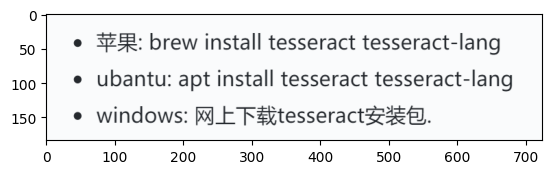

In [12]:
import matplotlib.pyplot as plt
import cv2
import pytesseract

img = cv2.imread('1.png')
plt.imshow(img[:,:,::-1])
text = pytesseract.image_to_string(img,lang="chi_sim")
print(text)